In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/earthquake_1995-2023.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
magnitude,1000.0,6.940150,0.438148,6.5000,6.60000,6.8000,7.10000,9.1000
cdi,1000.0,3.605000,3.328972,0.0000,0.00000,4.0000,7.00000,9.0000
mmi,1000.0,6.027000,1.433990,1.0000,5.00000,6.0000,7.00000,10.0000
tsunami,1000.0,0.325000,0.468609,0.0000,0.00000,0.0000,1.00000,1.0000
sig,1000.0,847.915000,301.802632,650.0000,691.00000,744.0000,874.25000,2910.0000
nst,1000.0,193.918000,239.045858,0.0000,0.00000,0.0000,403.00000,934.0000
dmin,1000.0,1.125174,2.073164,0.0000,0.00000,0.0000,1.54925,17.6540
gap,1000.0,20.926290,24.415895,0.0000,0.00000,18.0000,27.00000,239.0000
depth,1000.0,74.612541,130.812590,2.7000,16.00000,29.0000,55.00000,670.8100
latitude,1000.0,4.315554,26.633320,-61.8484,-13.51850,-2.4435,25.16725,71.6312


In [ ]:
data.isnull().sum()

,0
title,0
magnitude,0
date_time,0
cdi,0
mmi,0
alert,551
tsunami,0
sig,0
net,0
nst,0


In [ ]:
features = ["magnitude", "depth", "cdi", "mmi", "sig"]
target = "alert"
data = data[features + [target]]
data.head()

,magnitude,depth,cdi,mmi,sig,alert
0,6.5,192.955,7,4,657,green
1,6.5,69.727,8,6,775,yellow
2,6.6,171.371,7,5,899,green
3,7.2,32.571,6,6,860,green
4,7.3,21.000,0,5,820,NaN


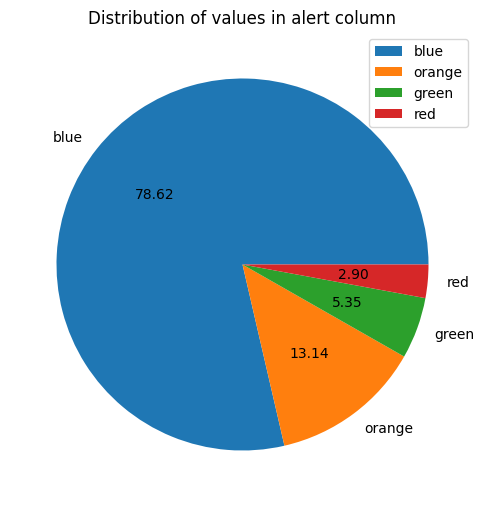

In [ ]:
plt.figure(figsize = (6,12))
plt.pie(x = data[target].value_counts(), labels = ['blue','orange','green','red'], autopct = '%.2f')
plt.title("Distribution of values in alert column")
plt.legend()
plt.show()

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 542
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  449 non-null    float64
 1   depth      449 non-null    float64
 2   cdi        449 non-null    int64  
 3   mmi        449 non-null    int64  
 4   sig        449 non-null    int64  
 5   alert      449 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 24.6+ KB


In [ ]:
data = data.astype({'cdi': 'int8', 'mmi': 'int8', 'sig': 'int8', 'depth': 'int16', 'alert': 'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 542
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   magnitude  449 non-null    float64 
 1   depth      449 non-null    int16   
 2   cdi        449 non-null    int8    
 3   mmi        449 non-null    int8    
 4   sig        449 non-null    int8    
 5   alert      449 non-null    category
dtypes: category(1), float64(1), int16(1), int8(3)
memory usage: 9.8 KB


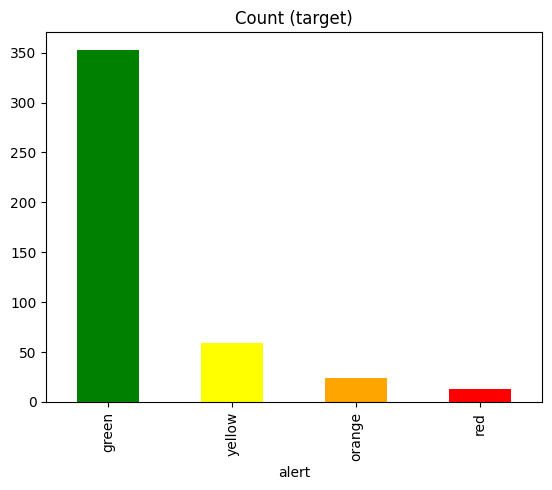

In [ ]:
data[target].value_counts().plot(kind='bar', title='Count (target)', color=['green', 'yellow', 'orange', 'red']);

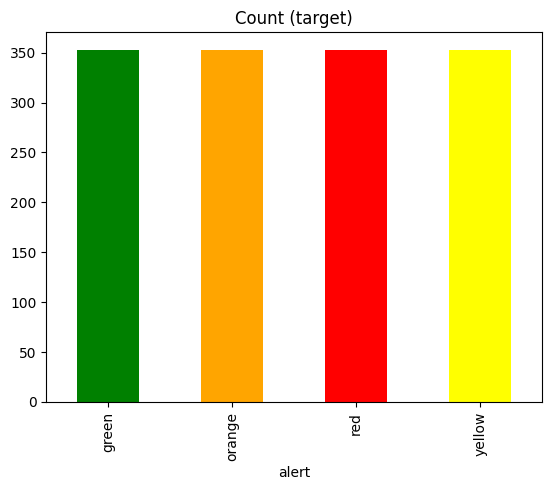

In [ ]:
from imblearn.over_sampling import SMOTE
X = data[features]
y = data[target]
X = X.loc[:,~X.columns.duplicated()]
sm = SMOTE(random_state=42)
X_res, y_res= sm.fit_resample(X, y,)
y_res.value_counts().plot(kind='bar', title='Count (target)', color=['green', 'orange', 'red', 'yellow']);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.preprocessing import LabelEncoder
# Assuming 'data' is your DataFrame

# Create a copy of the dataframe to avoid modifying the original dataframe.
df_encoded = data.copy()
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'alert' column
df_encoded['alert'] = label_encoder.fit_transform(df_encoded['alert'])

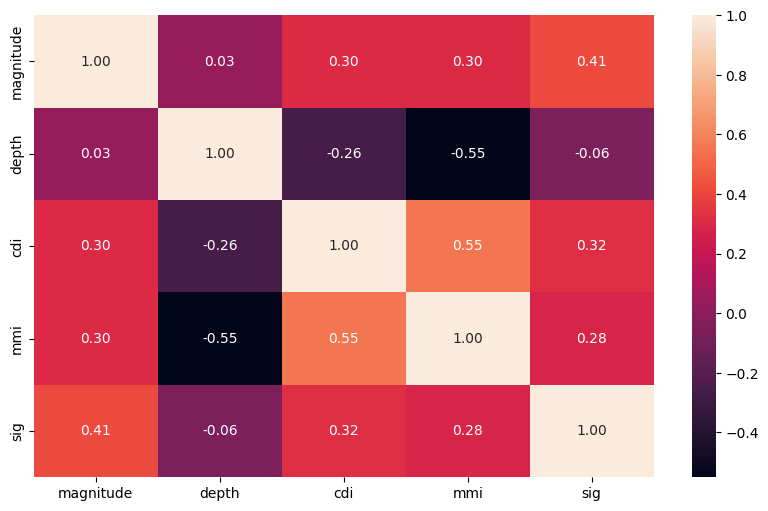

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.plot()
plt.show()

In [ ]:
models = []
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

85.51236749116607
              precision    recall  f1-score   support

       green       0.76      0.82      0.79        62
      orange       0.92      0.82      0.87        68
         red       0.90      0.95      0.93        78
      yellow       0.84      0.81      0.82        75

    accuracy                           0.86       283
   macro avg       0.85      0.85      0.85       283
weighted avg       0.86      0.86      0.86       283



[]

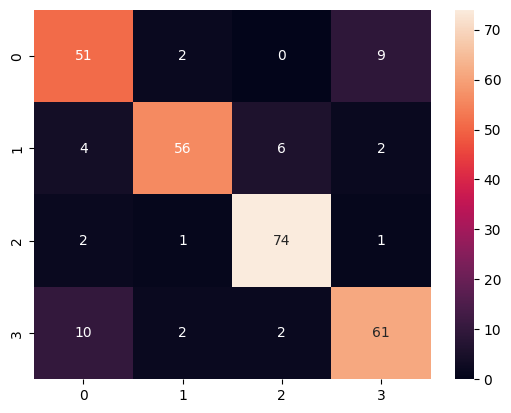

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
dt_pred = dt.predict(X_test)
print(accuracy_score(dt_pred,y_test)*100)
print(classification_report(dt_pred, y_test))
sns.heatmap(confusion_matrix(dt_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

83.03886925795054
              precision    recall  f1-score   support

       green       0.67      0.94      0.78        48
      orange       0.90      0.74      0.81        74
         red       0.93      0.87      0.90        87
      yellow       0.81      0.80      0.80        74

    accuracy                           0.83       283
   macro avg       0.83      0.84      0.82       283
weighted avg       0.85      0.83      0.83       283



[]

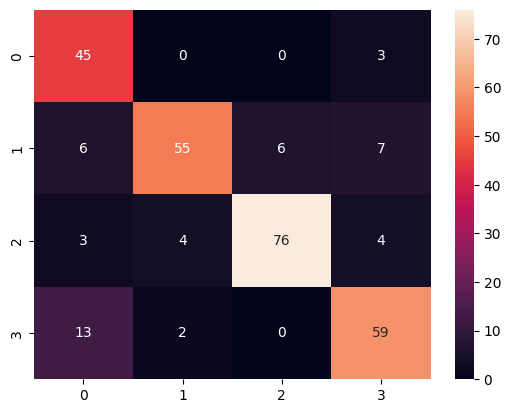

In [ ]:
knn_pred = knn.predict(X_test)
print(accuracy_score(knn_pred, y_test)*100)
print(classification_report(knn_pred, y_test))
sns.heatmap(confusion_matrix(knn_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

89.04593639575971
              precision    recall  f1-score   support

       green       0.76      0.94      0.84        54
      orange       0.95      0.85      0.90        68
         red       0.94      0.95      0.94        81
      yellow       0.90      0.82      0.86        80

    accuracy                           0.89       283
   macro avg       0.89      0.89      0.89       283
weighted avg       0.90      0.89      0.89       283



[]

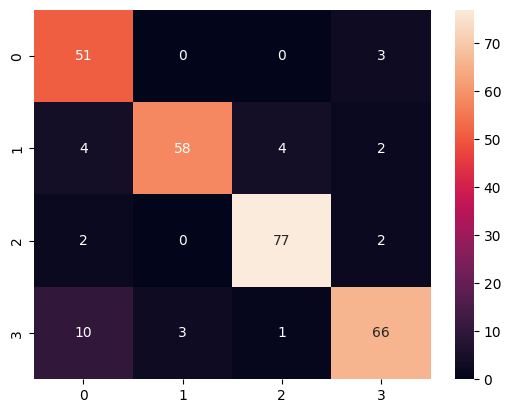

In [ ]:
rf_pred = rf.predict(X_test)
print(accuracy_score(rf_pred, y_test)*100)
print(classification_report(rf_pred, y_test))
sns.heatmap(confusion_matrix(rf_pred, y_test), annot = True)
plt.plot()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

87.63250883392226
              precision    recall  f1-score   support

       green       0.78      0.93      0.85        56
      orange       0.95      0.78      0.86        74
         red       0.91      0.95      0.93        79
      yellow       0.86      0.85      0.86        74

    accuracy                           0.88       283
   macro avg       0.88      0.88      0.87       283
weighted avg       0.88      0.88      0.88       283



[]

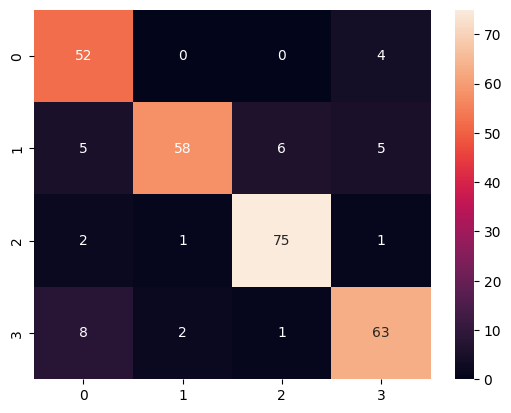

In [ ]:
gb_pred = gb.predict(X_test)
print(accuracy_score(gb_pred, y_test)*100)
print(classification_report(gb_pred, y_test))
sns.heatmap(confusion_matrix(gb_pred, y_test), annot = True)
plt.plot()